
##Homework_03:

* this is the right way to program - just making functions and classes and calling them!!!

* create notebook called: homework_03.ipynb (no spaces please)

* inside write a function: quadratic_interp(x,y,xinterp):

quadratic_interp(x,y,xinterp) accepts three elements (vector x, vector y and float xinterp to be interpolated) an returns yinterp value of the interpolated point xinterp

* use b_coeffs() function to find b_0,b_1,b_2...

* test your function before submitting

* **remember the function must not print anything, just return a single value!!**

In [ ]:
import numpy as np
from scipy.interpolate import interp1d
from scipy import interpolate
import matplotlib.pyplot as plt

In [ ]:
def b_coeffs(i,k,X,Y):
    #i, k are the first and last INDEX of `x`
    #If i+k>N
    if i+k>=len(X):
        return 0
    #Zeroth divided difference
    elif k == 0:
        return Y[i]
    #If higher divided difference
    else:
        return (b_coeffs(i+1, k-1, X, Y)-b_coeffs(i, k-1, X, Y))/(X[i+k]-X[i])       

In [ ]:
x=np.array([4,5,6])
y=np.array([np.log10(4),np.log10(5),np.log10(6)])
b_coeffs(0,0,x,y)

0.6020599913279624

In [ ]:
def quadratic_interp(x,y,xinterp):
    yinterp = b_coeffs(0,0,x,y) + b_coeffs(0,1,x,y) * (xinterp-x[0]) + b_coeffs(0,2,x,y) * (xinterp-x[0]) * (xinterp-x[1])
    return yinterp

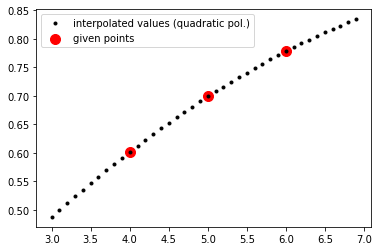

In [ ]:
test_vals=np.arange(3,7,0.1)

my_results=[]
for val in test_vals:
    result=quadratic_interp(x,y,val)
    my_results.append(result)
fig,ax=plt.subplots(1,1)
ax.scatter(x,y,c='r',s=100,label='given points')
ax.plot(test_vals,my_results,'.k',label='interpolated values (quadratic pol.)') 
ax.legend()